#📌 Extracción

In [18]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

import pandas as pd

df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [21]:
# Expandimos los diccionarios
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)
df_account = df['account'].apply(pd.Series)

# Unimos todo en un solo DataFrame
df = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                      df_customer, df_phone, df_internet, df_account], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}"
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}"
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}"
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}"


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7267 non-null   object
 1   Churn             7267 non-null   object
 2   gender            7267 non-null   object
 3   SeniorCitizen     7267 non-null   int64 
 4   Partner           7267 non-null   object
 5   Dependents        7267 non-null   object
 6   tenure            7267 non-null   int64 
 7   PhoneService      7267 non-null   object
 8   MultipleLines     7267 non-null   object
 9   InternetService   7267 non-null   object
 10  OnlineSecurity    7267 non-null   object
 11  OnlineBackup      7267 non-null   object
 12  DeviceProtection  7267 non-null   object
 13  TechSupport       7267 non-null   object
 14  StreamingTV       7267 non-null   object
 15  StreamingMovies   7267 non-null   object
 16  Contract          7267 non-null   object
 17  PaperlessBilli

In [23]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64

In [24]:
df = df[df['Churn'].isin(['Yes', 'No'])]
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [26]:
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
2064,2905-KFQUV,No,Female,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),"{'Monthly': 70.4, 'Total': '154.8'}"
4523,6199-IPCAO,No,Female,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,"{'Monthly': 26.1, 'Total': '692.55'}"
320,0463-WZZKO,No,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),"{'Monthly': 20.75, 'Total': '67.1'}"
3329,4633-MKHYU,No,Female,0,No,No,9,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,"{'Monthly': 88.4, 'Total': '788.6'}"
607,0867-MKZVY,Yes,Female,0,Yes,No,20,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,"{'Monthly': 82.4, 'Total': '1592.35'}"
2518,3518-PZXZQ,No,Female,0,Yes,No,1,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 55.3, 'Total': '55.3'}"
4200,5766-XQXMQ,Yes,Female,0,No,No,29,Yes,No,DSL,Yes,Yes,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),"{'Monthly': 68.85, 'Total': '1970.5'}"
1641,2325-ZUSFD,Yes,Female,0,Yes,Yes,57,Yes,No,DSL,Yes,No,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),"{'Monthly': 70.1, 'Total': '3913.3'}"
882,1241-EZFMJ,No,Male,0,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),"{'Monthly': 25.45, 'Total': '1538.6'}"
7130,9814-AOUDH,No,Male,0,No,No,53,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),"{'Monthly': 19.5, 'Total': '1050.5'}"


In [28]:
# Expandimos los diccionarios
df_charges = df['Charges'].apply(pd.Series)

# Unimos todo en un solo DataFrame
df = pd.concat([df.drop(['Charges'], axis=1),
                      df_charges], axis=1)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [29]:
df.rename(columns={
    'Monthly': 'Charges.Monthly',
    'Total': 'Charges.Total'
}, inplace=True)
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30
df.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
3087,4301-VVZKA,No,Male,0,Yes,No,16,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.40,1189.4,2.513333
146,0235-KGSLC,Yes,Female,0,No,No,1,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.55,85.55,2.851667
1219,1740-CSDJP,Yes,Male,0,No,No,1,No,No phone service,DSL,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),35.25,35.25,1.175000
5849,7998-WNZEM,No,Male,0,No,No,71,Yes,Yes,DSL,...,Yes,Yes,No,Yes,Two year,No,Bank transfer (automatic),80.60,5708.2,2.686667
2923,4063-EIKNQ,No,Male,0,Yes,Yes,11,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.95,267.35,0.698333
384,0550-DCXLH,No,Male,0,No,No,13,Yes,No,DSL,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,2.445000
1576,2242-MFOTG,No,Male,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,No,One year,No,Bank transfer (automatic),80.10,2603.3,2.670000
169,0266-CLZKZ,No,Female,0,Yes,Yes,67,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6717.9,3.521667
4103,5624-RYAMH,No,Female,0,No,No,9,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.50,178.85,0.650000
941,1328-EUZHC,No,Female,0,Yes,No,18,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,370.5,0.670000


In [31]:
df['Charges.Monthly'] = pd.to_numeric(df['Charges.Monthly'], errors='coerce')
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['Cuentas_Diarias'] = pd.to_numeric(df['Cuentas_Diarias'], errors='coerce')
df.tail()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667
7266,9995-HOTOH,No,Male,0,Yes,Yes,63,No,No phone service,DSL,...,Yes,No,Yes,Yes,Two year,No,Electronic check,59.00,3707.60,1.966667


In [32]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [33]:
yes_no_map = {
    'Yes': 1,
    'No': 0,
    'No internet service': 0,
    'No phone service': 0
}

cols_yes_no = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
]

for col in cols_yes_no:
    df[col] = df[col].map(yes_no_map)


In [34]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [35]:
df.dtypes

customerID           object
Churn                 int64
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
Cuentas_Diarias     float64
dtype: object

#📊 Carga y análisis

In [37]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


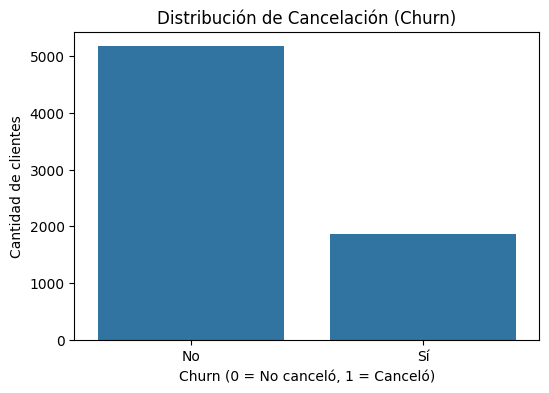

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


# Gráfico de conteo
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title('Distribución de Cancelación (Churn)')
plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
plt.ylabel('Cantidad de clientes')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()


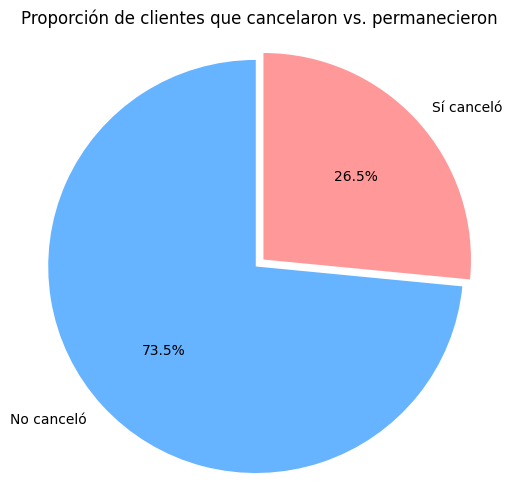

In [43]:
# Cálculo de proporciones
churn_counts = df['Churn'].value_counts()
labels = ['No canceló', 'Sí canceló']
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=(0, 0.05))
plt.title('Proporción de clientes que cancelaron vs. permanecieron')
plt.axis('equal')
plt.show()


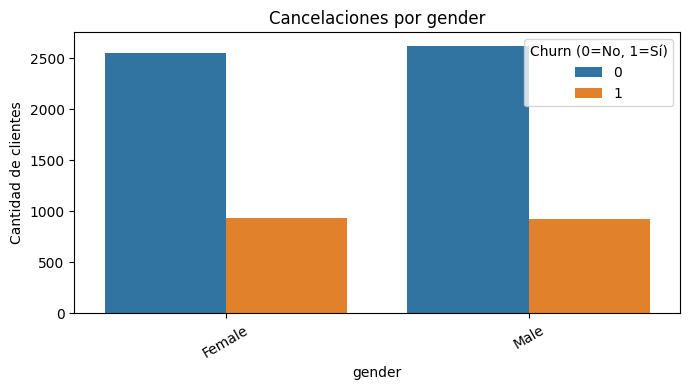

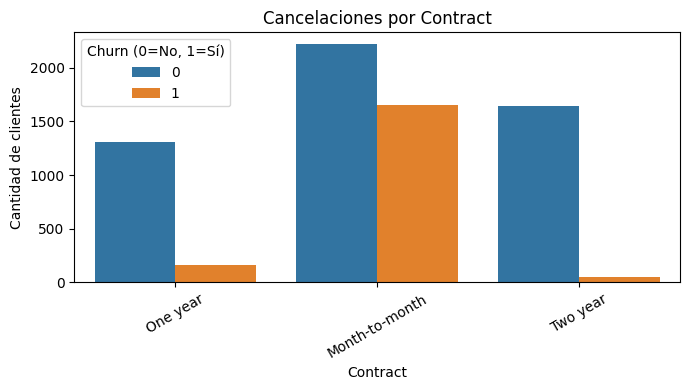

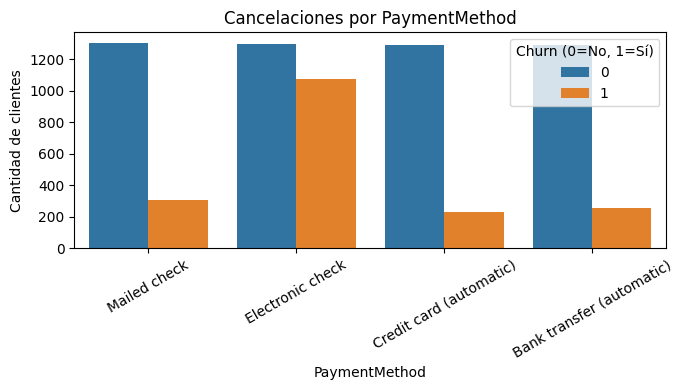

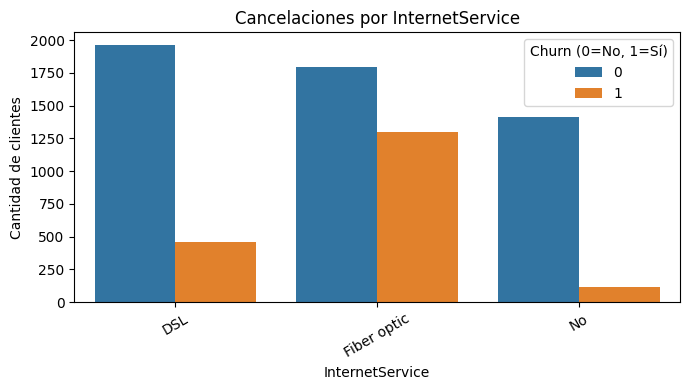

In [44]:
categorical_columns = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

for col in categorical_columns:
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Cancelaciones por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de clientes')
    plt.xticks(rotation=30)
    plt.legend(title='Churn (0=No, 1=Sí)')
    plt.tight_layout()
    plt.show()

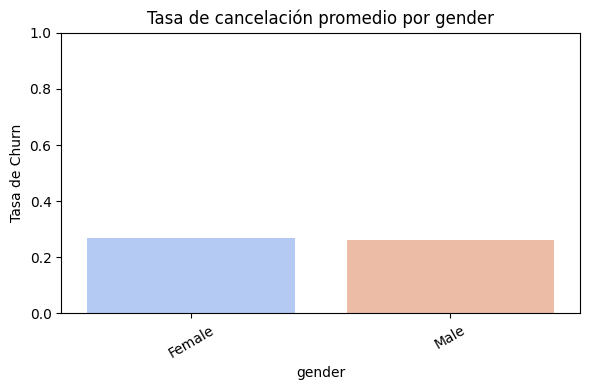

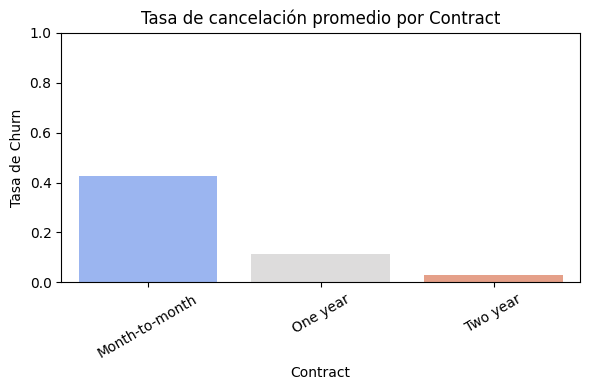

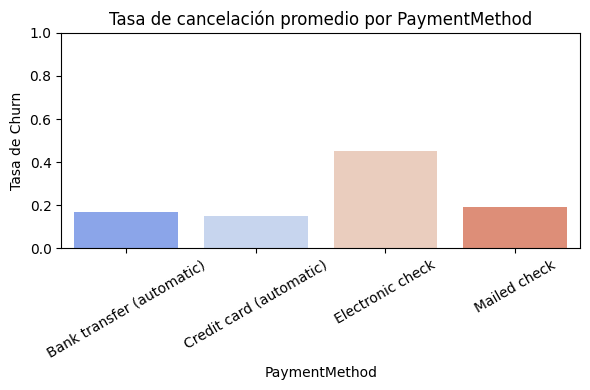

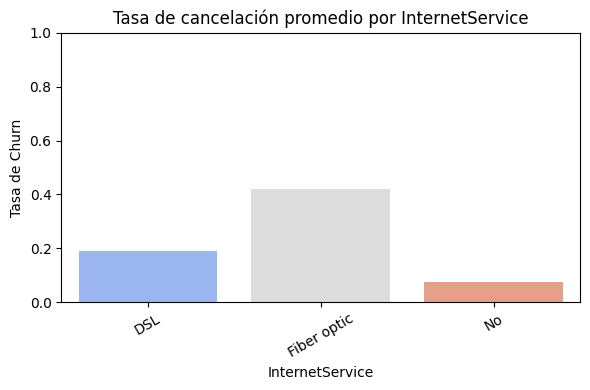

In [46]:
for col in categorical_columns:
    prop_df = df.groupby(col)['Churn'].mean().reset_index()

    plt.figure(figsize=(6,4))
    sns.barplot(data=prop_df, x=col, y='Churn', hue=col, palette='coolwarm', legend=False)
    plt.title(f'Tasa de cancelación promedio por {col}')
    plt.ylabel('Tasa de Churn')
    plt.xticks(rotation=30)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


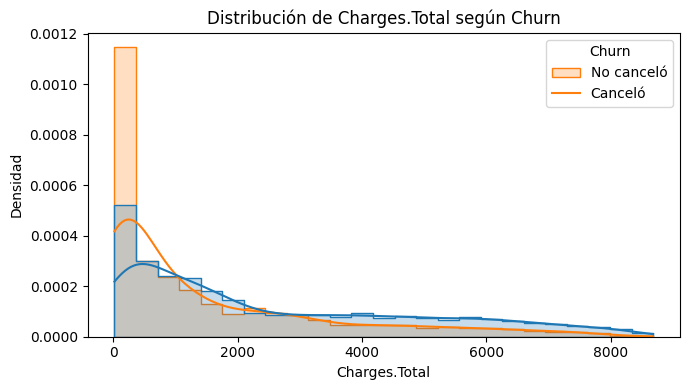

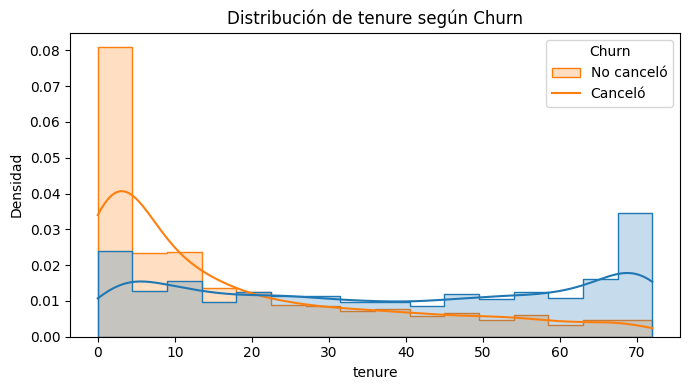

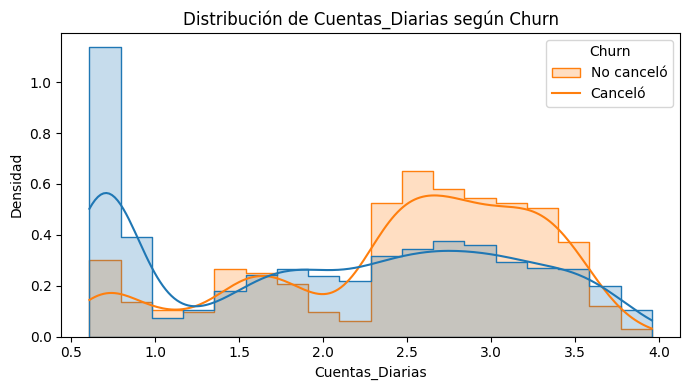

In [51]:

variables_numericas = ['Charges.Total', 'tenure', 'Cuentas_Diarias']

for var in variables_numericas:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=var, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} según Churn')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend(title='Churn', labels=['No canceló', 'Canceló'])
    plt.tight_layout()
    plt.show()


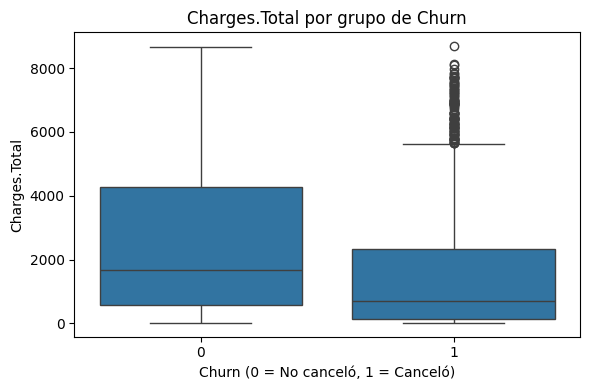

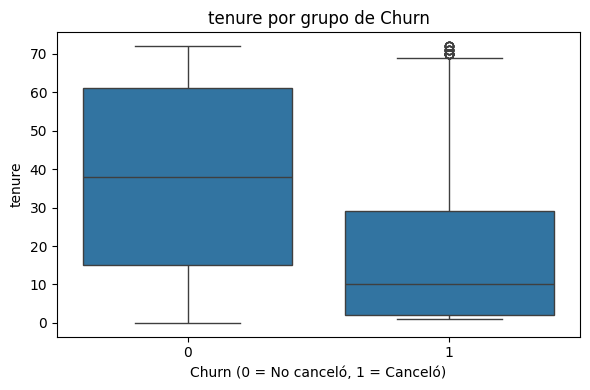

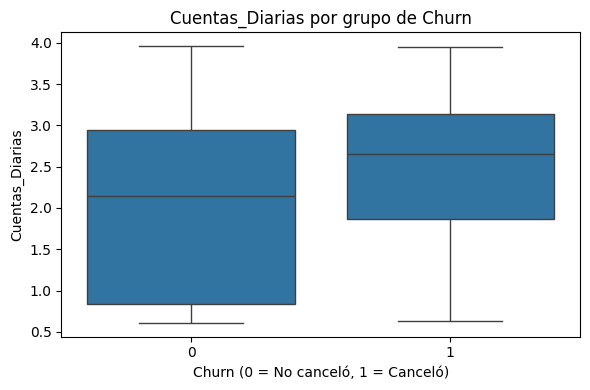

In [50]:
variables_numericas = ['Charges.Total', 'tenure', 'Cuentas_Diarias']

for var in variables_numericas:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=var)
    plt.title(f'{var} por grupo de Churn')
    plt.xlabel('Churn (0 = No canceló, 1 = Canceló)')
    plt.tight_layout()
    plt.show()